В этом разделе приведено описание учебного кейса — «Сегментация клиентов онлайн-магазина подарков». Давайте познакомимся с описанием, постановкой задачи, а также с примерной последовательностью шагов, необходимых для её решения.

## **Постановка задачи**

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением **[электронной коммерции](https://trends.rbc.ru/trends/industry/607fe4549a7947027eaffbe6)**, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать **[модели поведения профессиональных покупателей](http://b2bmotion.ru/b2b-pokupatel)**, определять категорию клиентов (например, лояльные/перспективные/новички/«спящие»/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных.

Однако в **[The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)** создали набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предстоит поработать в этом проекте.

Датасет содержит все транзакции, произошедшие за период с 01/12/2010 по 09/12/2011, для базирующейся в Великобритании компании, занимающейся розничной онлайн-торговлей. Компания в основном продаёт уникальные подарки на все случаи жизни. Многие клиенты являются оптовиками.

**Бизнес-задача**: произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science**: построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Ваши основные цели:**
1. Произвести предобработку набора данных.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать категории товаров и клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.

## **Данные и их описание**

Данные представляют собой таблицу в формате .csv, в каждой строке которой содержится информация об уникальной транзакции. Скачать исходные данные можно по **[этой ссылке.](https://lms-cdn.skillfactory.ru/assets/courseware/v1/468638e49cb9e7d4b4dfdc296c1c778e/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/pj6_data.zip)**

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква 'C' в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.

**Важные инсайты по данным, которые помогут вам в решении задачи:**

* Исходная таблица представляет собой данные о транзакциях, произведённых за указанный период. Ваша задача — кластеризация клиентов на основе совершённых ими транзакций. Важно понимать связь между исходными данными и постановкой задачи.
* В заказе может быть указано отрицательное количество товара (Quantity < 0). Как правило, это свидетельствует о возврате товара, но также может означать скидки.
* В системе учёта транзакций на каждый уникальный товар в заказе заводится отдельная транзакция.

Например, в заказе под номером '536365' содержится семь уникальных товаров:

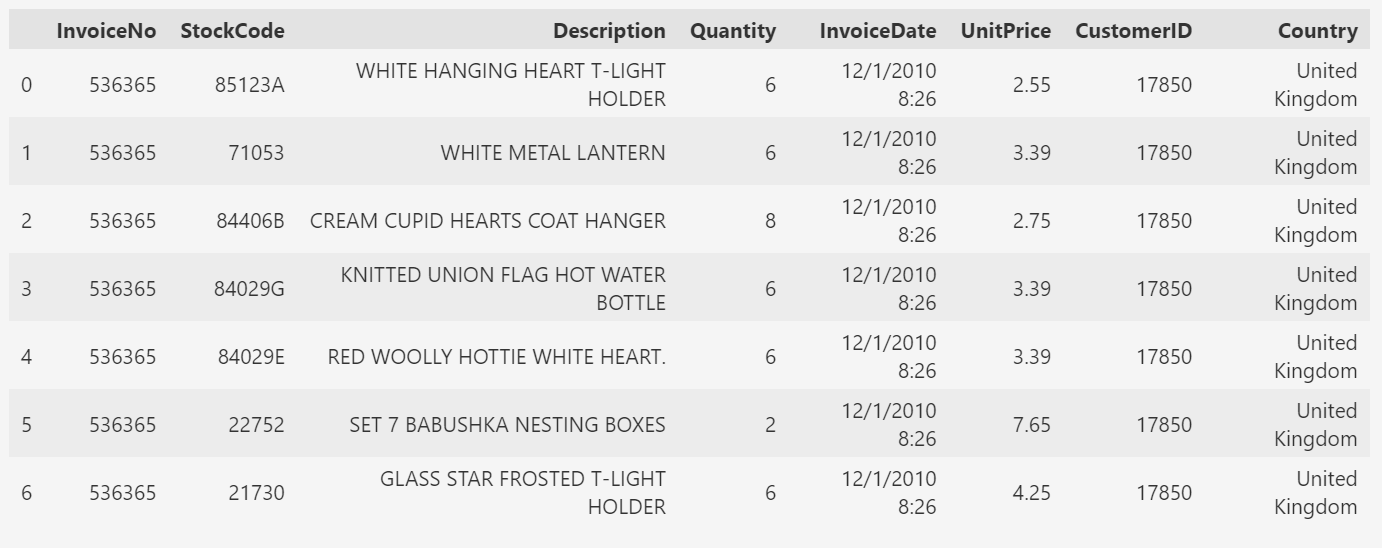

* На возврат каждого уникального товара также заводится отдельная транзакция (уникальная запись в таблице).

Ниже приведён пример пары «заказ — отмена». Обратите внимание на столбцы StockCode, UnitPrice, CustomerID и Quantity — сравните их для двух транзакций:

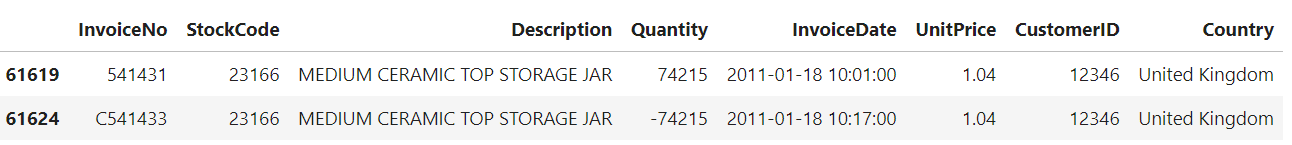

* Номер заказа (**InvoiceNo**) может содержать не только числа, но и символы.

Например, символ 'C' перед номером заказа указывает на признак возврата. То есть в таблице должна находиться запись с такими же идентификаторами клиента и товара, но номером заказа без символа 'C' и с положительным количеством товара.

* Код товара (StockCode) также может содержать не только числа, но и символы.

Например, 'D' означает, что товар является скидочным и на такие товары нет аналогов с положительным числом товаров в заказе.

* Однако не все заказы с отрицательным количеством товара имеют в таблице свои аналоги (контрагентов). В качестве примера приведём отсортированные по дате транзакции, относящиеся к клиенту с идентификатором '15311' и товаром под кодом '35004C':

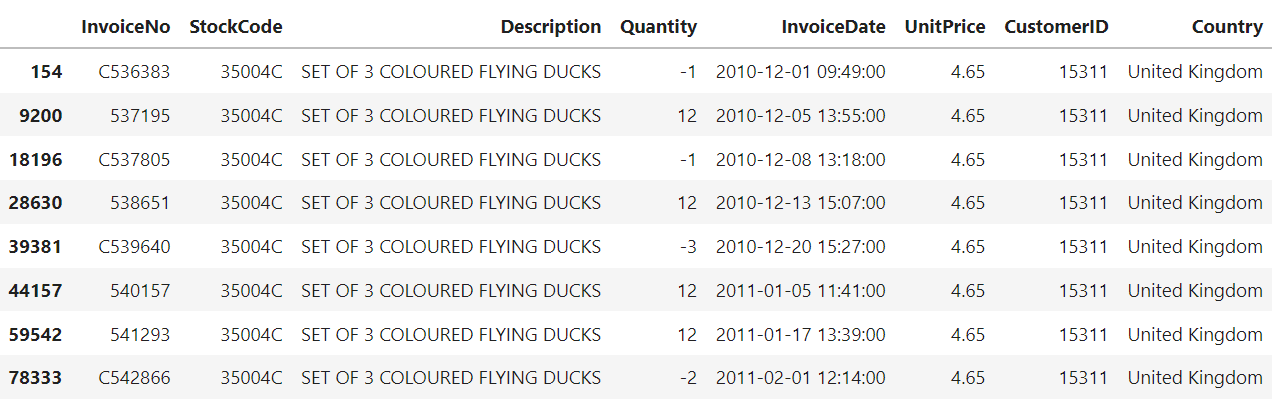

* В первой строке мы замечаем заказ с отменой (номер заказа начинается с символа 'C'). Однако возникает вопрос: на какой заказ пришла эта отмена, ведь более ранних записей о транзакциях, связанных с этим клиентом, нет?

Дело в том, что заказ на покупку этого товара от клиента поступил раньше декабря 2010 года, а этих данных в нашей таблице нет.

**Примечание.** Это очень популярная проблема, которая возникает практически при любой работе с транзакциями: у нас есть только фрагмент из общих данных, и нам неизвестно, что ему предшествовало.

* По двум следующим строкам видно, что клиент может отменить не весь заказ, а только его часть (5 декабря клиент покупает 12 единиц товара, а 8 декабря оформляет возврат только на одну единицу товара). Мы должны запомнить это на будущее.
**Этапы решения задачи и подсказки**
Ниже приведён примерный план решения задачи сегментации клиентов. Вы можете использовать его как основу для своего решения. Также мы привели несколько вспомогательных функций, которые могут помочь вам в предобработке данных, а также описание методики RFM, на основе которой стоит производить разделение клиентов на сегменты.

Также мы подготовили для нас ноутбук-шаблон, который вы также можете взять за основу.

**[Скачать ноутбук-шаблон](https://lms-cdn.skillfactory.ru/assets/courseware/v1/4642b13815ffc9d35d11cb47ddb9a447/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/PROJECT-6._%D0%A1%D0%B5%D0%B3%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D1%8F_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%BE%D0%BD%D0%BB%D0%B0%D0%B9%D0%BD-%D0%BC%D0%B0%D0%B3%D0%B0%D0%B7%D0%B8%D0%BD%D0%B0.ipynb)**

## **1. Знакомство со структурой данных**
Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Познакомьтесь с исходными данными поближе:

* Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
* Узнайте, сколько уникальных клиентов совершали транзакции в указанный период.
* Узнайте, из каких стран совершались транзакции.
* Исследуйте данные на наличие пропусков и дубликатов.
* Переведите столбцы в корректные форматы (например, даты в формат datetime).

2. Преобразование, очистка и анализ данных
2.1. Преобразование и очистка данных о транзакциях
2.1.1. Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалите их из данных.

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID — тогда пропуски в столбце Description удаляются автоматически.

**2.1.2. Дубликаты**

Проверьте данные на наличие дубликатов и удалите их из данных.

**2.1.3.** Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:

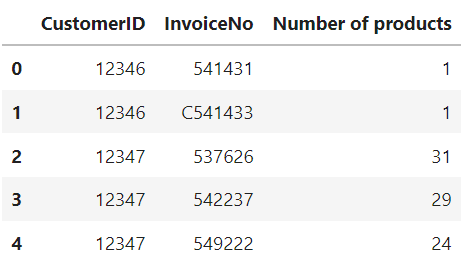

**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

Создайте в ваших данных о транзакциях признак QuantityCanceled. Этот признак будет указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. Для транзакций, для которых не было возвратов, признак будет равен 0. Для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

В качестве вспомогательного инструмента мы подготовили для вас функцию **get_quantity_canceled()**. Эта функция принимает на вход таблицу с транзакциями и возвращает объект Series — столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции. Если транзакция не имеет контрагента, этот признак помечается как NaN.

Отметим, что эта функция не учитывает сложный случай, когда количество отменённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом). При желании вы можете самостоятельно модифицировать функцию для предобработки, чтобы учесть этот пограничный случай.

**Осторожно!** Поиск отменённых транзакций занимает много времени из-за большого количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от мощности компьютера.

```python
def get_quantity_canceled(data):
    """Функция для создания признака количества отменённых заказов.
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, признак помечается как NaN.

    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """
    # Инициализируем нулями Series той же длины, что и столбцы таблицы.
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)    
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) &
                       (data['InvoiceDate'] < col['InvoiceDate']) &
                       (data['Quantity'] > 0)].copy()
        # Транзакция-возврат не имеет контрагента — ничего не делаем
        if (df_test.shape[0] == 0):
            # Помечаем столбец как пропуск
            quantity_canceled.loc[index] = np.nan
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отменённого в столбец QuantityCanceled
        elif (df_test.shape[0] == 1):
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']      
        # Транзакция-возврат имеет несколько контрагентов
        # Задаём количество отменённого товара в столбце QuantityCanceled для той транзакции на покупку,
        # в которой количество товара больше количества товаров в транзакции-возврате
        elif (df_test.shape[0] > 1):
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']:
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break    
    return quantity_canceled

data['QuantityCanceled'] = get_quantity_canceled(data)
```
Узнайте, сколько транзакций в данных не имеют контрагентов, и, если их количество невелико, удалите их из данных.

Когда вы разобрались с возвратами, удалите транзакции с отрицательным количеством товара — они нам больше не нужны.

2.1.4. Специализированные транзакции

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

**Подсказка.** В качестве шаблона для поиска используйте строку '^[a-zA-Z]+'.

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы.

**2.1.5. Транзакции с товарами без стоимости**

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

**2.1.6. Общая стоимость товаров в транзакции**

Добавьте в ваш датасет общую цену заказа (TotalPrice). Она рассчитывается как:

$$\text{общая цена} = \text{цена за единицу товара} * (\text{количество товара заказа} - \text{количество отменённых товаров})$$

Этот признак впоследствии поможет вам рассчитать покупательскую способность каждого из клиентов.

Помимо рекомендованных преобразований, вы также можете придумать собственные и применить их к исходным данным.

После завершения предобработки сохраните результат очищения данных в отдельный файл, чтобы впоследствии вам не приходилось повторять эти действия.

## **2.2. Разведывательный анализ данных о транзакциях**

После предобработки исходных данных произведите разведывательный анализ и исследуйте транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)?

**Примечание.** Вы можете сформулировать и другие вопросы. Главная цель — извлечь максимум понятной информации из исходных данных.
Свои рассуждения сопроводите графиками и диаграммами.

**2.3. Построение RFM-таблицы и поиск RFM-выбросов**
Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM.

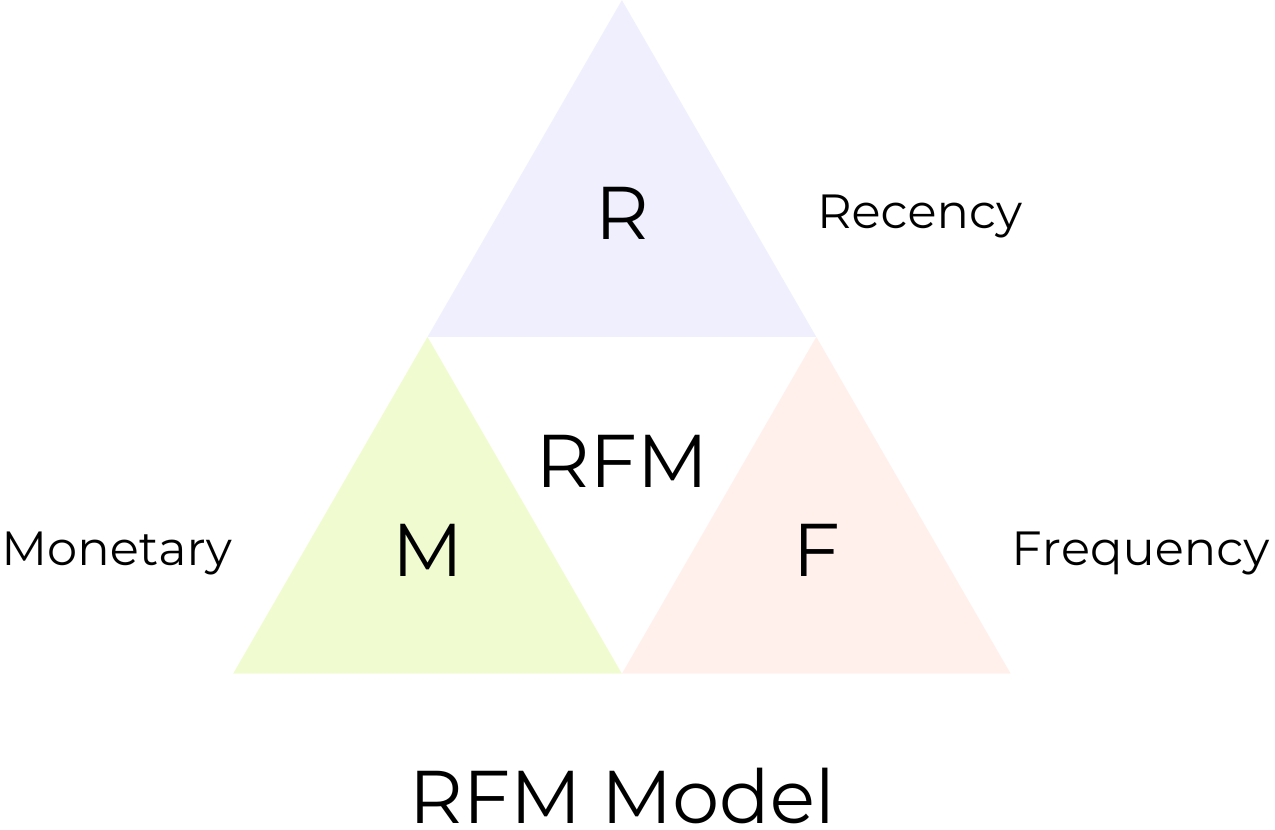

Метод заключается в группировке клиентов на основе следующих параметров:

* Recency (давность) — давность последней покупки клиента;
* Frequency (частота) — общее количество покупок клиента;
* Monetary Value (денежная ценность) — сколько денег потратил клиент.

Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов.

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

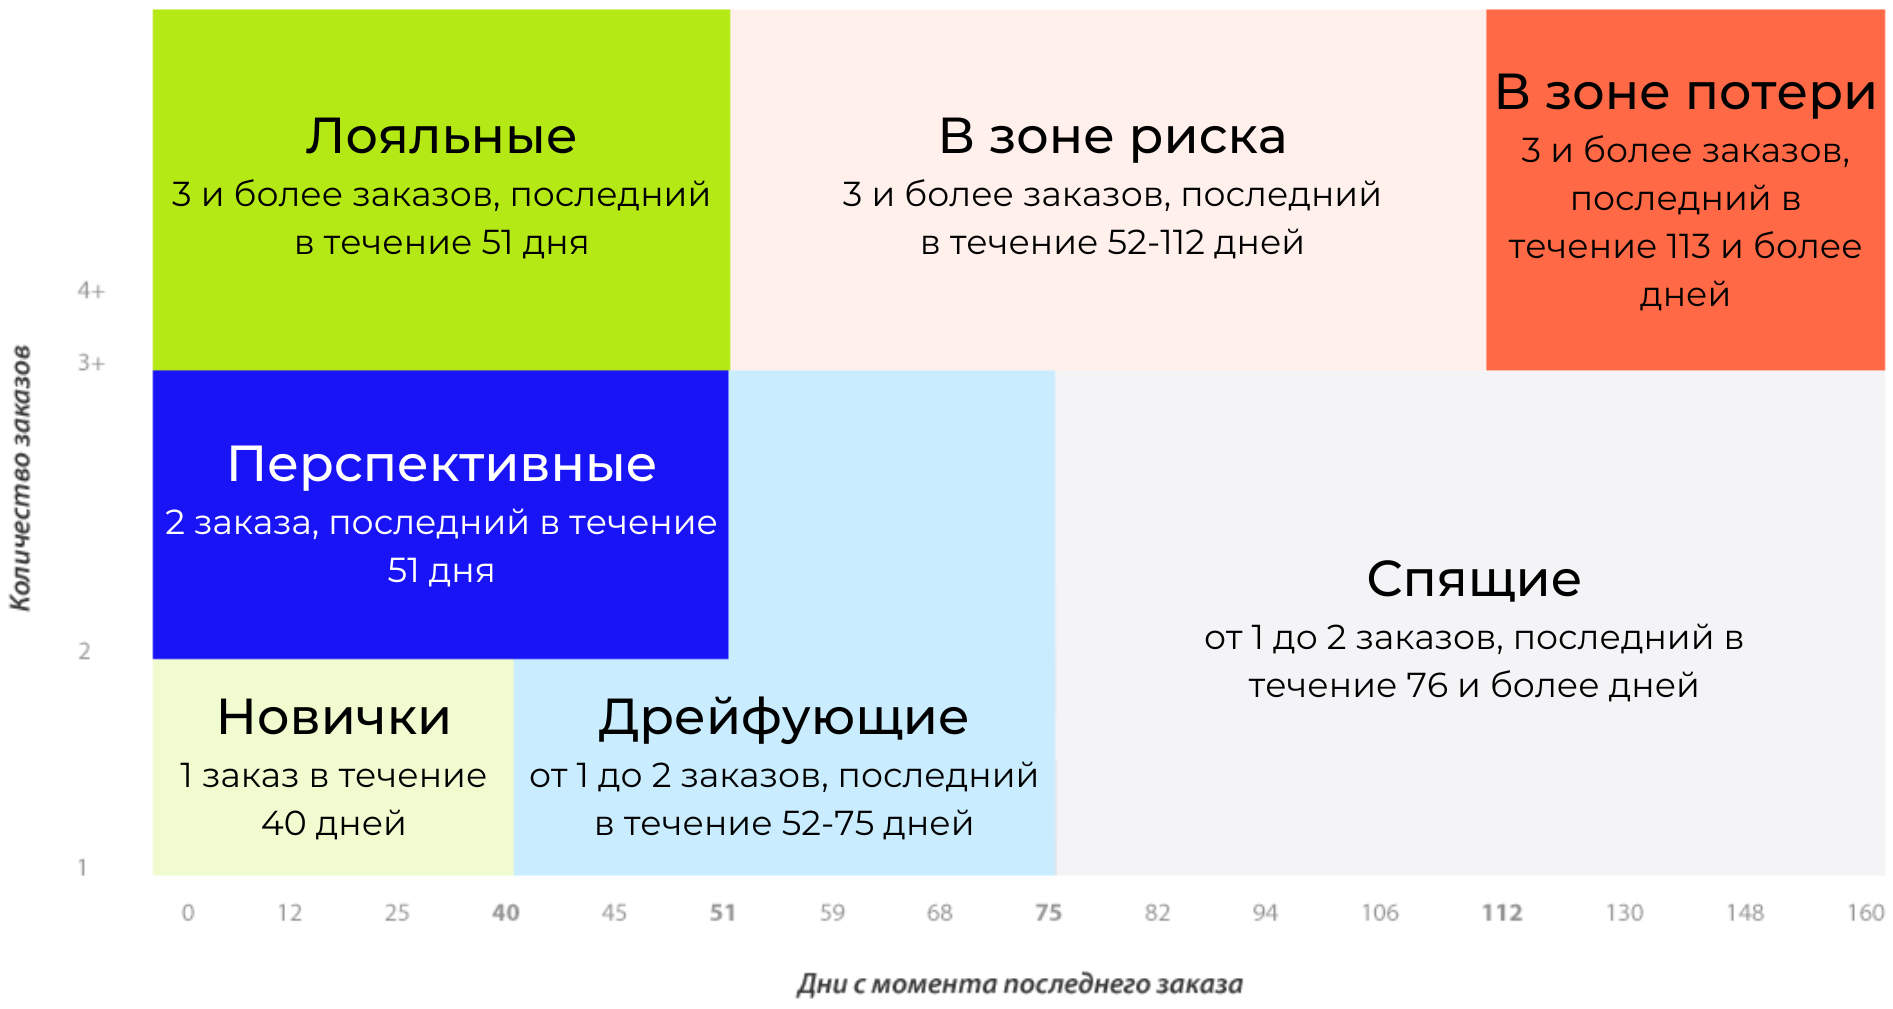

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Итак, приступим к созданию нашей RFM-таблицы.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие агрегированные характеристики:

* Recency для $i$-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни: $t_0-max(t_{i1}, \ t_{i2}, \ ..., \ t_{iM})$, где где $t_{ij}$ — дата и время совершения $i$-ым клиентом своей $j$-ой покупки.

В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').
* Frequency рассчитывается как общее количество уникальных заказов, которые совершил -ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую -ый клиент потратил на наши товары (с учётом возвратов).
Когда рассчитаете все характеристики, не забудьте дать столбцам получившейся таблицы соответствующие названия.

В результате у вас должна получиться примерно такая таблица (ниже представлено пять строк):

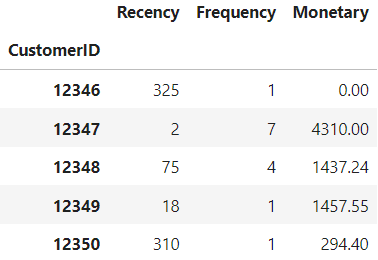

После того как вы подготовите RFM-таблицу, визуализируйте каждую из трёх компонент, например, в виде коробчатых диаграмм (boxplot). Вы получите примерно следующие результаты (графики могут отличаться в зависимости от того, как вы выполните предобработку данных):

```python
boxes = [px.box(rfm_table, x=column) for column in rfm_table.columns]
fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)


for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)


fig.update_layout(showlegend=True)
#fig.write_html('plotly/boxplot_1.html')
fig.show()
```


Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.

## **3. Моделирование и оценка качества моделей**
### **3.1. Кластеризация на основе RFM-характеристик**

Чтобы результаты кластеризации было удобнее интерпретировать, вы можете уменьшить размерность исходных признаков до двух компонент.

Подсказка. Чтобы методы понижения размерности работали стабильно, данные необходимо стандартизировать/нормализовать. Для удобства оберните эти шаги по предобработке данных в pipeline.

Произведите предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков с помощью известных вам методов (используйте минимум три метода).

Подберите оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелевантно для маркетинга).

Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.

### **3.2. Интерпретация кластеров**
#### **3.2.1. Визуализация кластеров**

Когда вы выберете лучший алгоритм кластеризации и подберёте для него параметры, переходите к интерпретации полученных кластеров.

Визуализируйте результаты в виде 3D-диаграммы с осями Recency, Frequency и Monetary. Проанализируйте полученную диаграмму и попробуйте понять, какие кластеры у вас получились.

#### **3.2.2. Построение профиля кластеров**

Далее составьте так называемый профиль кластеров. Для этого вам необходимо вернуться от декомпозированных данных (если вы производили понижение размерности) к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — Radar Chart (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник.

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

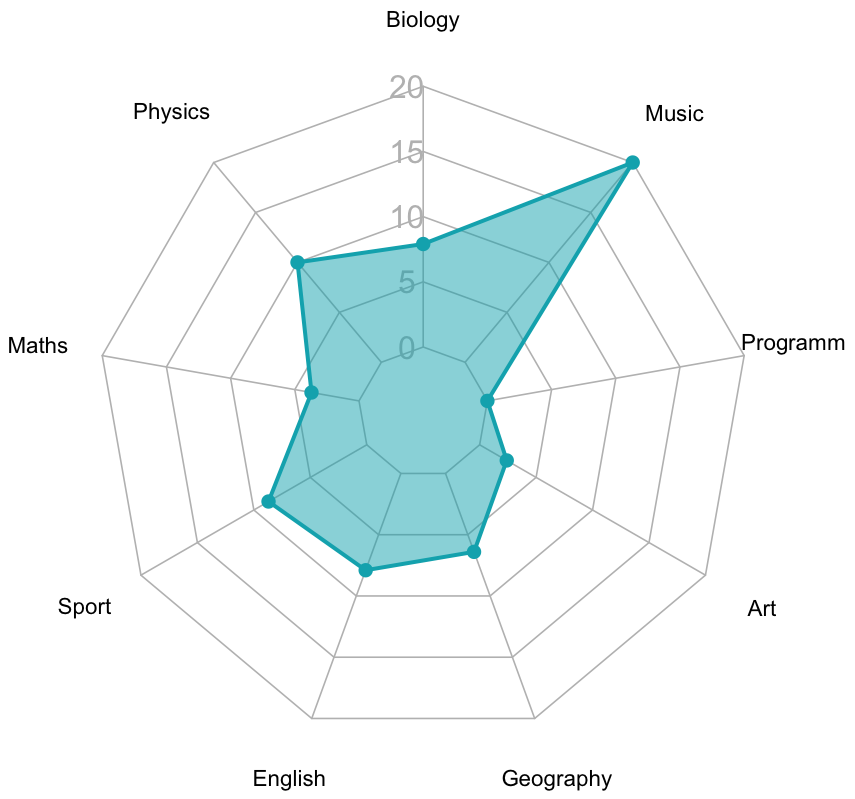

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).

В модуле graph_objects библиотеки plotly есть встроенная функция Scatterpolar, которая позволяет построить полярную диаграмму. На основе этой функции мы подготовили для вас функцию plot_cluster_profile(), которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У неё есть два параметра: grouped_data — сгруппированные по кластерам характеристики объектов (клиентов), n_clusters — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в функцию plot_cluster_profile().
```python
def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = preprocessing.MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устанавливаем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()
```
Теперь у вас есть удобный инструмент для анализа профиля кластеров. Воспользуйтесь им, чтобы проинтерпретировать результаты, полученные на предыдущем шаге.

## **4. Выводы и оформление работы**
Напишите заключение о проделанной работе и полученных результатах. Отметьте, какие сегменты клиентов вам удалось найти в данных.

После завершения проекта создайте в своём репозитории файл README.md и кратко опишите содержимое проекта по принципу, который мы приводили ранее.

Выложите свой проект на GitHub и оформите удалённый репозиторий, добавив в него описание и теги репозитория (теги придумайте самостоятельно в зависимости от того, какую задачу вы решали).

#  **Дополнительные шаги**
**Поздравляем!** Вы справились с проектом и решили задачу сегментации клиентов. Вы успешно предобработали данные, произвели разведывательный анализ, а также кластеризацию клиентов и на основе полученных кластеров построили модель, определяющую сегмент клиента.

В заключение отметим, что сегментация клиентов не ограничивается только RFM-анализом. Что ещё можно сделать?

* Выделить оптовиков в отдельный сегмент. В таком случае идея метода RFM расширяется путём добавления в датасет информации о среднем количестве покупаемого товара за один заказ. То есть аббревиатура RFM превращается в RFMQ, где Q — среднее количество товаров в одном заказе.
* Произвести кластерный анализ товаров на основе их описания и сформировать категории, по которым совершаются покупки.
* Рассчитать частоту покупки каждой категории товаров для каждого клиента. Эта информация может стать основой для построения модели кластеризации и сегментирования клиентов по их интересам.
* Наконец, воспользоваться информацией о сезонности покупок и добавить в модель информацию о частоте покупок клиентов в каждый из месяцев. Так можно определить, какие клиенты являются постоянными, то есть их покупки не зависят от сезона, а какие покупают товары только в преддверии праздников. Эта информация позволит экспериментировать с маркетинговой кампанией и повышать лояльность клиентов.

Как вы видите, можно реализовать множество идей и улучшить качество сегментации клиентов, тем самым повысив эффективность маркетинга.

Вы можете самостоятельно воплотить несколько стратегий формирования признаков клиентов или даже придумать собственные. Подобные эксперименты пойдут только на пользу вашему профессиональному росту и вашему портфолио.